In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# อ่านไฟล์ CSV
file_path = "../RawData/DataSet_Total_Gas.csv"  # ตรวจสอบว่าไฟล์อยู่ตำแหน่งนี้จริง
df = pd.read_csv(file_path)

# แสดงข้อมูล 5 แถวแรก เพื่อตรวจสอบว่าโหลดมาถูกต้อง
print(df.head())

   Date     GHG    CH4     CO2  F-Gas    N2O
0  1990  172.45  57.03   99.65   0.27  15.51
1  1991  183.94  59.53  108.04   0.46  15.92
2  1992  196.51  60.56  118.56   0.65  16.76
3  1993  214.40  60.59  135.01   0.83  17.97
4  1994  229.66  61.19  149.36   1.02  18.09


🔸 Missing Values ในแต่ละคอลัมน์ 🔸
Date     0
GHG      4
CH4      4
CO2      4
F-Gas    4
N2O      4
dtype: int64

🔸 ข้อมูลที่มีค่าหายไป 🔸
    Date  GHG  CH4  CO2  F-Gas  N2O
32  2022  NaN  NaN  NaN    NaN  NaN
33  2023  NaN  NaN  NaN    NaN  NaN
34  2024  NaN  NaN  NaN    NaN  NaN
35  2025  NaN  NaN  NaN    NaN  NaN


C:\Users\Asus\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


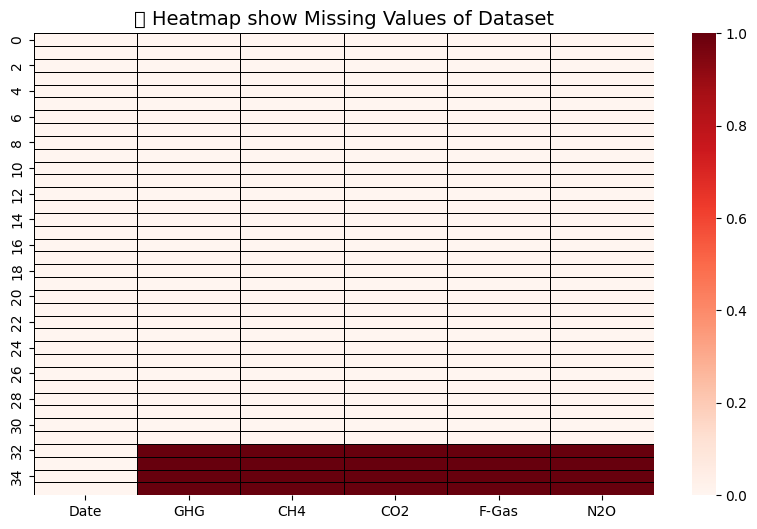

In [ ]:
#🔸ตรวจสอบค่าที่หายไป & แก้ไข Missing Values (ค่าหาย)
print("🔸 Missing Values ในแต่ละคอลัมน์ 🔸")
print(df.isnull().sum())

# แสดงแถวที่มี Missing Values
df_missing = df[df.isnull().any(axis=1)]
print("\n🔸 ข้อมูลที่มีค่าหายไป 🔸")
print(df_missing)

# แสดงแถวที่มี Missing Values  (ใช้ Heatmap)
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap="Reds", cbar=True, linewidths=0.5, linecolor="black")
plt.title("🔴 Heatmap show Missing Values of Dataset", fontsize=14)
plt.show()

🔸 Missing Values ในแต่ละคอลัมน์ หลังจากลบแล้ว 🔸
Date     0
GHG      0
CH4      0
CO2      0
F-Gas    0
N2O      0
dtype: int64


C:\Users\Asus\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


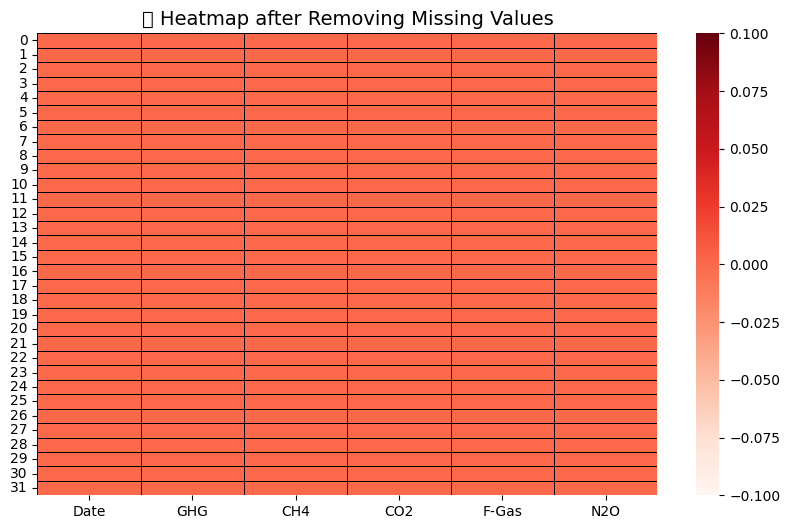

In [ ]:
#🔹 วิธีแก้ไขข้อมูล
#ลบแถวที่มีค่าหายไป
df.dropna(inplace=True)

# ตรวจสอบอีกครั้งว่ามีค่าหายไปหรือไม่
print("🔸 Missing Values ในแต่ละคอลัมน์ หลังจากลบแล้ว 🔸")
print(df.isnull().sum())

# แสดง Heatmap อีกครั้ง
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap="Reds", cbar=True, linewidths=0.5, linecolor="black")
plt.title("🔴 Heatmap after Removing Missing Values", fontsize=14)
plt.show()

In [ ]:
# 🔸ตรวจสอบ & แก้ไข Data Inconsistency (ข้อมูลไม่สอดคล้องกัน)
# 📌 เงื่อนไขที่ต้องตรวจสอบ:
# ค่าของ GHG ต้องเป็นผลรวมของ CH4 + CO2 + F-Gas + N2O

# คำนวณค่าผลรวมที่ถูกต้อง
df["GHG_Calculated"] = df["CH4"] + df["CO2"] + df["F-Gas"] + df["N2O"]

# ตรวจสอบว่าค่า GHG ตรงกับค่าที่คำนวณได้หรือไม่
df["Inconsistency"] = df["GHG"] != df["GHG_Calculated"]

# แสดงเฉพาะแถวที่มีความไม่สอดคล้องกัน
inconsistent_rows = df[df["Inconsistency"]]
print("🔹 ข้อมูลที่มีความไม่สอดคล้องกัน 🔹")
print(inconsistent_rows)

# แสดงจำนวนแถวที่ไม่สอดคล้องกัน
print(f"\n🔹 จำนวนแถวที่ไม่สอดคล้องกัน: {len(inconsistent_rows)} แถว")

🔹 ข้อมูลที่มีความไม่สอดคล้องกัน 🔹
    Date     GHG    CH4     CO2  F-Gas    N2O  GHG_Calculated  Inconsistency
0   1990  172.45  57.03   99.65   0.27  15.51          172.46           True
1   1991  183.94  59.53  108.04   0.46  15.92          183.95           True
2   1992  196.51  60.56  118.56   0.65  16.76          196.53           True
4   1994  229.66  61.19  149.36   1.02  18.09          229.66           True
6   1996  268.79  62.83  187.01   1.97  16.99          268.80           True
7   1997  278.52  66.44  192.91   2.73  16.45          278.53           True
11  2001  237.01  70.05  144.90   5.37  16.68          237.00           True
14  2004  283.62  75.57  180.92   6.47  20.66          283.62           True
15  2005  291.19  76.84  188.25   6.84  19.25          291.18           True
16  2006  294.61  76.94  190.86   8.03  18.79          294.62           True
18  2008  313.11  82.12  200.07  10.40  20.52          313.11           True
19  2009  309.76  84.12  190.95  11.59  23

In [ ]:
# 🔸 ตรวจสอบประเภทของข้อมูลในแต่ละคอลัมน์
print("🔹 ประเภทข้อมูลของแต่ละคอลัมน์ 🔹")
print(df.dtypes)

🔹 ประเภทข้อมูลของแต่ละคอลัมน์ 🔹
Date                int64
GHG               float64
CH4               float64
CO2               float64
F-Gas             float64
N2O               float64
GHG_Calculated    float64
Inconsistency        bool
dtype: object


In [ ]:
#🔹 วิธีแก้ไขข้อมูล
# แก้ไขค่าที่ผิดพลาด
df.loc[df["Inconsistency"], "GHG"] = df["GHG_Calculated"]

# ลบคอลัมน์ที่ใช้คำนวณออก
df.drop(columns=["GHG_Calculated", "Inconsistency"], inplace=True)

# แสดงผลลัพธ์ที่แก้ไขแล้ว
print("\n✅ ข้อมูลที่แก้ไขแล้ว ✅")
print(df)

# ตรวจสอบอีกครั้งหลังจากการแก้ไข
df["GHG_Calculated"] = df["CH4"] + df["CO2"] + df["F-Gas"] + df["N2O"]
df["Inconsistency"] = df["GHG"] != df["GHG_Calculated"]

# แสดงผลลัพธ์ของแถวที่ยังคงมีความไม่สอดคล้องกัน
inconsistent_rows_after_fix = df[df["Inconsistency"]]


✅ ข้อมูลที่แก้ไขแล้ว ✅
    Date     GHG    CH4     CO2  F-Gas    N2O
0   1990  172.46  57.03   99.65   0.27  15.51
1   1991  183.95  59.53  108.04   0.46  15.92
2   1992  196.53  60.56  118.56   0.65  16.76
3   1993  214.40  60.59  135.01   0.83  17.97
4   1994  229.66  61.19  149.36   1.02  18.09
5   1995  248.12  61.53  167.85   1.21  17.53
6   1996  268.80  62.83  187.01   1.97  16.99
7   1997  278.53  66.44  192.91   2.73  16.45
8   1998  259.40  66.95  171.91   3.48  17.06
9   1999  270.73  68.55  180.44   4.24  17.50
10  2000  271.09  69.50  180.28   5.00  16.31
11  2001  237.00  70.05  144.90   5.37  16.68
12  2002  250.41  69.78  157.04   5.74  17.85
13  2003  260.81  73.34  161.80   6.11  19.56
14  2004  283.62  75.57  180.92   6.47  20.66
15  2005  291.18  76.84  188.25   6.84  19.25
16  2006  294.62  76.94  190.86   8.03  18.79
17  2007  311.96  82.23  198.08   9.21  22.44
18  2008  313.11  82.12  200.07  10.40  20.52
19  2009  309.78  84.12  190.95  11.59  23.12
20  2010  

In [ ]:
#🔹 ตรวจสอบอีกที
# หากไม่มีข้อมูลไม่สอดคล้องกันจะมีแถวที่ว่าง
if len(inconsistent_rows_after_fix) == 0:
    print("✅ ไม่มีข้อมูลที่ไม่สอดคล้องกันหลังจากการแก้ไข")
else:
    print("🔹 ข้อมูลที่ยังคงไม่สอดคล้องกัน 🔹")
    print(inconsistent_rows_after_fix)

# ลบคอลัมน์ที่ใช้คำนวณออก
df.drop(columns=["GHG_Calculated", "Inconsistency"], inplace=True)

✅ ไม่มีข้อมูลที่ไม่สอดคล้องกันหลังจากการแก้ไข


In [ ]:
#🔸ตรวจสอบ & แก้ไข Data Redundancy (ข้อมูลซ้ำซ้อน)
# แสดงข้อมูลก่อนการลบข้อมูลซ้ำ
print("🔹 ข้อมูลก่อนการลบข้อมูลซ้ำ 🔹")
print(df)

# ตรวจสอบข้อมูลซ้ำ
duplicates = df[df.duplicated()]
# แสดงข้อความหากไม่มีข้อมูลซ้ำ
if duplicates.empty:
    print("\n🔹 ไม่มีข้อมูลที่ซ้ำ 🔹")
else:
    print("\n🔸 ข้อมูลที่ซ้ำ 🔸")
    print(duplicates)

🔹 ข้อมูลก่อนการลบข้อมูลซ้ำ 🔹
    Date     GHG    CH4     CO2  F-Gas    N2O
0   1990  172.46  57.03   99.65   0.27  15.51
1   1991  183.95  59.53  108.04   0.46  15.92
2   1992  196.53  60.56  118.56   0.65  16.76
3   1993  214.40  60.59  135.01   0.83  17.97
4   1994  229.66  61.19  149.36   1.02  18.09
5   1995  248.12  61.53  167.85   1.21  17.53
6   1996  268.80  62.83  187.01   1.97  16.99
7   1997  278.53  66.44  192.91   2.73  16.45
8   1998  259.40  66.95  171.91   3.48  17.06
9   1999  270.73  68.55  180.44   4.24  17.50
10  2000  271.09  69.50  180.28   5.00  16.31
11  2001  237.00  70.05  144.90   5.37  16.68
12  2002  250.41  69.78  157.04   5.74  17.85
13  2003  260.81  73.34  161.80   6.11  19.56
14  2004  283.62  75.57  180.92   6.47  20.66
15  2005  291.18  76.84  188.25   6.84  19.25
16  2006  294.62  76.94  190.86   8.03  18.79
17  2007  311.96  82.23  198.08   9.21  22.44
18  2008  313.11  82.12  200.07  10.40  20.52
19  2009  309.78  84.12  190.95  11.59  23.12
20  2

In [ ]:
#🔹 วิธีแก้ไขข้อมูล_ถ้ามีลบข้อมูลซ้ำ
df_no_duplicates = df.drop_duplicates()

# แสดงข้อมูลหลังการลบข้อมูลซ้ำ
print("\n✅ ข้อมูลหลังจากการลบข้อมูลซ้ำ ✅")
print(df_no_duplicates)


✅ ข้อมูลหลังจากการลบข้อมูลซ้ำ ✅
    Date     GHG    CH4     CO2  F-Gas    N2O
0   1990  172.46  57.03   99.65   0.27  15.51
1   1991  183.95  59.53  108.04   0.46  15.92
2   1992  196.53  60.56  118.56   0.65  16.76
3   1993  214.40  60.59  135.01   0.83  17.97
4   1994  229.66  61.19  149.36   1.02  18.09
5   1995  248.12  61.53  167.85   1.21  17.53
6   1996  268.80  62.83  187.01   1.97  16.99
7   1997  278.53  66.44  192.91   2.73  16.45
8   1998  259.40  66.95  171.91   3.48  17.06
9   1999  270.73  68.55  180.44   4.24  17.50
10  2000  271.09  69.50  180.28   5.00  16.31
11  2001  237.00  70.05  144.90   5.37  16.68
12  2002  250.41  69.78  157.04   5.74  17.85
13  2003  260.81  73.34  161.80   6.11  19.56
14  2004  283.62  75.57  180.92   6.47  20.66
15  2005  291.18  76.84  188.25   6.84  19.25
16  2006  294.62  76.94  190.86   8.03  18.79
17  2007  311.96  82.23  198.08   9.21  22.44
18  2008  313.11  82.12  200.07  10.40  20.52
19  2009  309.78  84.12  190.95  11.59  23.12
2

In [ ]:
#💠จำลองข้อมูลที่ซ้ำ-โดยการคัดลอกข้อมูลทั้งแถวของปี 2012 โดยการคัดลอกแถวนี้และเพิ่มลงไปใน DataFrame
# สร้างข้อมูลซ้ำโดยการคัดลอกแถวของปี 2012
df_duplicate = df[df['Date'] == 2012].copy()

# เพิ่มข้อมูลซ้ำลงไปใน DataFrame
df_with_duplicates = pd.concat([df, df_duplicate], ignore_index=True)

# ตรวจสอบข้อมูลซ้ำ
duplicates = df_with_duplicates[df_with_duplicates.duplicated(keep=False)]  # keep=False เพื่อให้แสดงแถวทั้งหมดที่ซ้ำ

# แสดงข้อความหากไม่มีข้อมูลซ้ำ
if duplicates.empty:
    print("\n🔸 ไม่มีข้อมูลที่ซ้ำ 🔸")
else:
    print("\n🔸 ข้อมูลที่ซ้ำ 🔸")
    print(duplicates)
    
#🔹 วิธีแก้ไขข้อมูล-ลบแถวที่ซ้ำโดย เก็บแถวแรกที่พบและลบแถวที่ซ้ำ
# แสดงข้อมูลก่อนการลบข้อมูลซ้ำ
    print("🔹 ข้อมูลก่อนการลบข้อมูลซ้ำ 🔹")
    print(df_with_duplicates)

# ลบข้อมูลที่ซ้ำและเก็บแถวแรก
df_without_duplicates = df_with_duplicates.drop_duplicates(keep='first')

# แสดงข้อมูลหลังจากการลบซ้ำ
print("\n🔹 ข้อมูลหลังการลบข้อมูลซ้ำ 🔹")
print(df_without_duplicates)

# ตรวจสอบข้อมูลซ้ำอีกครั้ง
duplicates_after_drop = df_without_duplicates[df_without_duplicates.duplicated(keep=False)]

# แสดงข้อความหากไม่มีข้อมูลซ้ำ
if duplicates_after_drop.empty:
    print("\n🔹 ไม่มีข้อมูลที่ซ้ำ 🔹")
else:
    print("\n🔸 ข้อมูลที่ซ้ำ 🔸")
    print(duplicates_after_drop)


🔸 ข้อมูลที่ซ้ำ 🔸
    Date    GHG    CH4    CO2  F-Gas    N2O
22  2012  388.8  88.96  256.2  19.78  23.86
32  2012  388.8  88.96  256.2  19.78  23.86
🔹 ข้อมูลก่อนการลบข้อมูลซ้ำ 🔹
    Date     GHG    CH4     CO2  F-Gas    N2O
0   1990  172.46  57.03   99.65   0.27  15.51
1   1991  183.95  59.53  108.04   0.46  15.92
2   1992  196.53  60.56  118.56   0.65  16.76
3   1993  214.40  60.59  135.01   0.83  17.97
4   1994  229.66  61.19  149.36   1.02  18.09
5   1995  248.12  61.53  167.85   1.21  17.53
6   1996  268.80  62.83  187.01   1.97  16.99
7   1997  278.53  66.44  192.91   2.73  16.45
8   1998  259.40  66.95  171.91   3.48  17.06
9   1999  270.73  68.55  180.44   4.24  17.50
10  2000  271.09  69.50  180.28   5.00  16.31
11  2001  237.00  70.05  144.90   5.37  16.68
12  2002  250.41  69.78  157.04   5.74  17.85
13  2003  260.81  73.34  161.80   6.11  19.56
14  2004  283.62  75.57  180.92   6.47  20.66
15  2005  291.18  76.84  188.25   6.84  19.25
16  2006  294.62  76.94  190.86   8.03 

✅ ไม่มี Outliers ในคอลัมน์ GHG
✅ ไม่มี Outliers ในคอลัมน์ CH4
✅ ไม่มี Outliers ในคอลัมน์ CO2
🔴 Outliers ในคอลัมน์ F-Gas:
    Date     GHG    CH4     CO2  F-Gas    N2O
29  2019  451.56  79.10  287.21  63.24  22.01
30  2020  451.85  79.97  277.04  71.47  23.37
31  2021  449.51  81.82  269.11  76.46  22.12
--------------------------------------------------
✅ ไม่มี Outliers ในคอลัมน์ N2O


C:\Users\Asus\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3649 (\N{THAI CHARACTER SARA AE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Asus\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3626 (\N{THAI CHARACTER SO SUA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Asus\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3604 (\N{THAI CHARACTER DO DEK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Asus\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3591 (\N{THAI CHARACTER NGO NGU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Asus\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 36

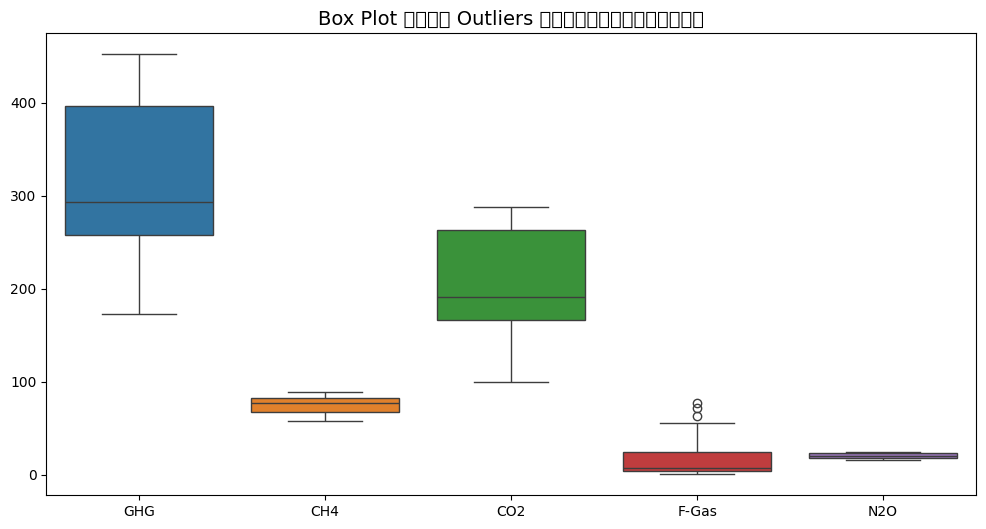

In [ ]:
#🔸ตรวจสอบ Outliers (ข้อมูลแปลกประหลาด)
# ใช้วิธีหาด้วย IQR Method
# ฟังก์ชันหาค่า Outlier ด้วย IQR
def find_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# หา Outliers ในทุกคอลัมน์
outlier_results = {}
for col in ["GHG", "CH4", "CO2", "F-Gas", "N2O"]:
    outliers = find_outliers_iqr(df, col)
    outlier_results[col] = outliers

# แสดงค่า Outliers ที่พบ
for col, outliers in outlier_results.items():
    if not outliers.empty:
        print(f"🔴 Outliers ในคอลัมน์ {col}:")
        print(outliers)
        print("-" * 50)
    else:
        print(f"✅ ไม่มี Outliers ในคอลัมน์ {col}")

# แสดง Box Plot ของแต่ละคอลัมน์
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[["GHG", "CH4", "CO2", "F-Gas", "N2O"]])
plt.title("Box Plot แสดง Outliers ในแต่ละคอลัมน์", fontsize=14)
plt.show()

C:\Users\Asus\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Asus\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3586 (\N{THAI CHARACTER KHO KHAI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Asus\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3629 (\N{THAI CHARACTER O ANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Asus\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3591 (\N{THAI CHARACTER NGO NGU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Asus\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3585 

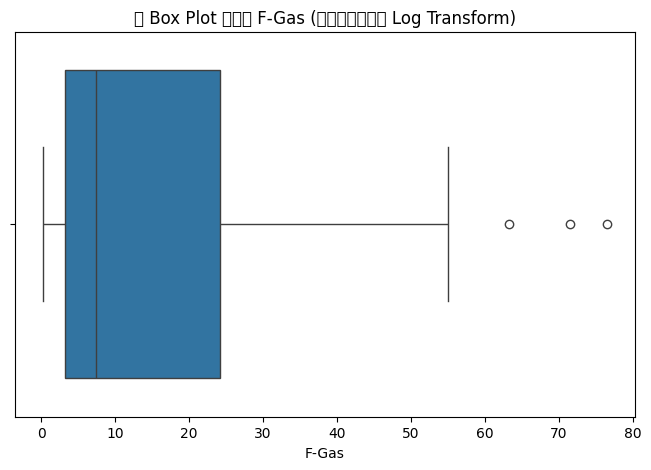

C:\Users\Asus\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Asus\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3586 (\N{THAI CHARACTER KHO KHAI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Asus\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3629 (\N{THAI CHARACTER O ANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Asus\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3591 (\N{THAI CHARACTER NGO NGU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Asus\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 362

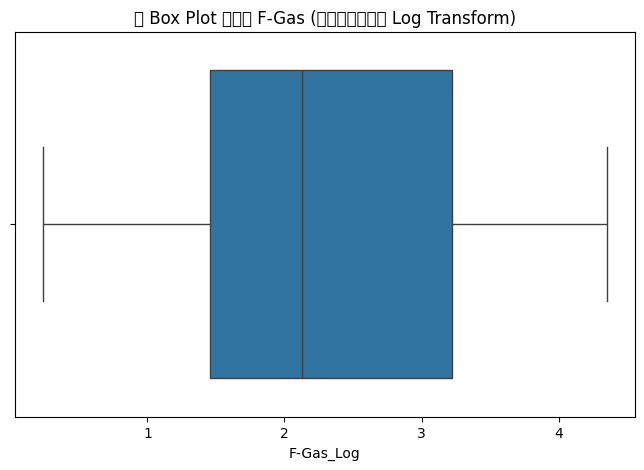

Index(['Date', 'GHG', 'CH4', 'CO2', 'F-Gas', 'N2O', 'F-Gas_Log',
       'F-Gas_Reverted'],
      dtype='object')
   F-Gas  F-Gas_Reverted          diff
0   0.27            0.27  0.000000e+00
1   0.46            0.46  0.000000e+00
2   0.65            0.65 -1.110223e-16
3   0.83            0.83  1.110223e-16
4   1.02            1.02  0.000000e+00
5   1.21            1.21  0.000000e+00
6   1.97            1.97  2.220446e-16
7   2.73            2.73  0.000000e+00
8   3.48            3.48 -4.440892e-16
9   4.24            4.24  0.000000e+00
   Date     GHG    CH4     CO2  F-Gas    N2O
0  1990  172.46  57.03   99.65   0.27  15.51
1  1991  183.95  59.53  108.04   0.46  15.92
2  1992  196.53  60.56  118.56   0.65  16.76
3  1993  214.40  60.59  135.01   0.83  17.97
4  1994  229.66  61.19  149.36   1.02  18.09


In [ ]:
#🔹 วิธีแก้ไขข้อมูล_ใช้ Log Transformation ลดผลกระทบ Outliers
#ใช้ np.log1p(x) แปลงค่า
#ใช้ np.expm1(x) แปลงค่ากลับ
#แสดงกราฟ Box Plot ก่อนทำ Log Transform
plt.figure(figsize=(8,5))
sns.boxplot(x=df["F-Gas"])
plt.title("🔴 Box Plot ของ F-Gas (ก่อนใช้ Log Transform)")
plt.show()

#ใช้ Log Transform กับคอลัมน์ F-Gas
df["F-Gas_Log"] = np.log1p(df["F-Gas"])  # log(1 + F-Gas)

#แสดงกราฟ Box Plot หลังทำ Log Transform
plt.figure(figsize=(8,5))
sns.boxplot(x=df["F-Gas_Log"])
plt.title("🟢 Box Plot ของ F-Gas (หลังใช้ Log Transform)")
plt.show()

#วิธีแปลงค่ากลับไปเป็นค่าปกติ
df["F-Gas_Reverted"] = np.expm1(df["F-Gas_Log"])  # แปลงกลับ exp(F-Gas_Log) - 1

#ตรวจสอบค่าก่อนและหลังแปลงกลับ
df[["F-Gas", "F-Gas_Log", "F-Gas_Reverted"]].head()
print(df.columns)

df[["F-Gas", "F-Gas_Log", "F-Gas_Reverted"]].head()

#*การแปลงค่ากลับไปใช้ค่าเดิมทำได้โดยใช้ np.expm1()*
df["F-Gas_Reverted"] = np.expm1(df["F-Gas_Log"])  # แปลงค่ากลับ exp(F-Gas_Log) - 1
df["diff"] = df["F-Gas"] - df["F-Gas_Reverted"] 
print(df[["F-Gas", "F-Gas_Reverted", "diff"]].head(10))
#ลบคอลัมน์ที่ไม่ได้ใช้
df.drop(columns=["F-Gas_Log", "diff","F-Gas_Reverted"], inplace=True)
print(df.head())

              Date         GHG        CH4         CO2      F-Gas        N2O
count    32.000000   32.000000  32.000000   32.000000  32.000000  32.000000
mean   2005.500000  314.643750  74.559062  202.264687  17.885000  19.935000
std       9.380832   84.870165   9.718977   55.708404  22.043362   2.830443
min    1990.000000  172.460000  57.030000   99.650000   0.270000  15.510000
25%    1997.750000  257.152500  66.822500  166.337500   3.292500  17.390000
50%    2005.500000  292.900000  76.890000  190.905000   7.435000  20.040000
75%    2013.250000  396.197500  82.177500  262.515000  24.167500  22.670000
max    2021.000000  451.850000  88.960000  287.210000  76.460000  24.370000


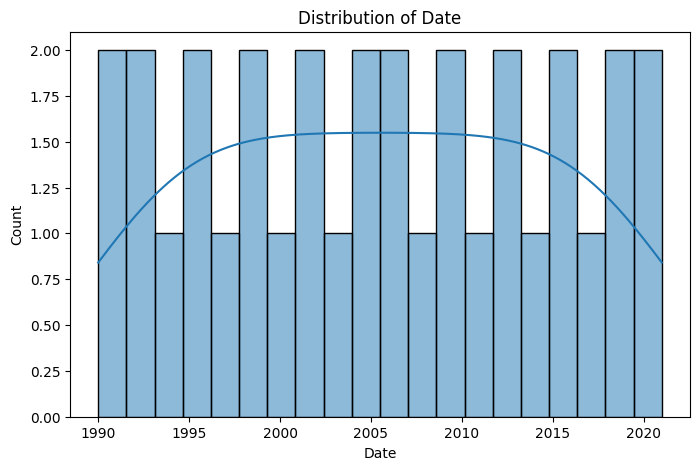

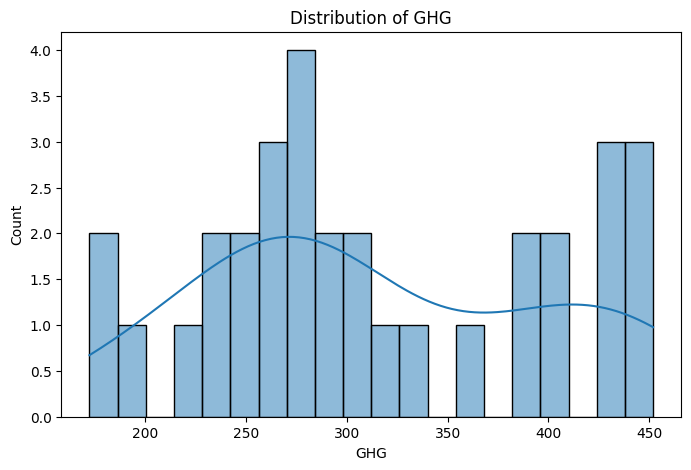

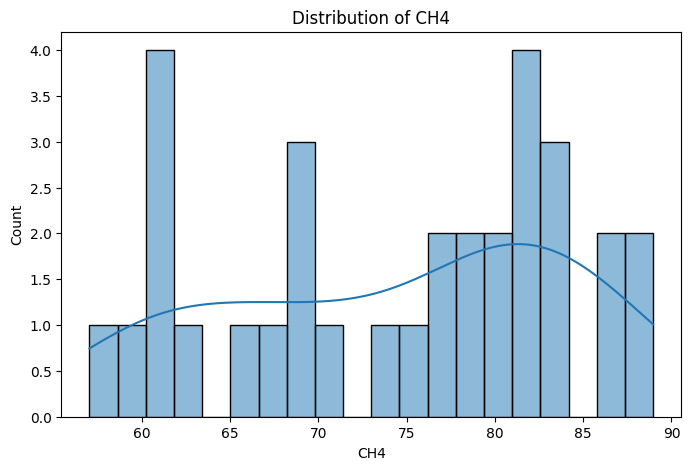

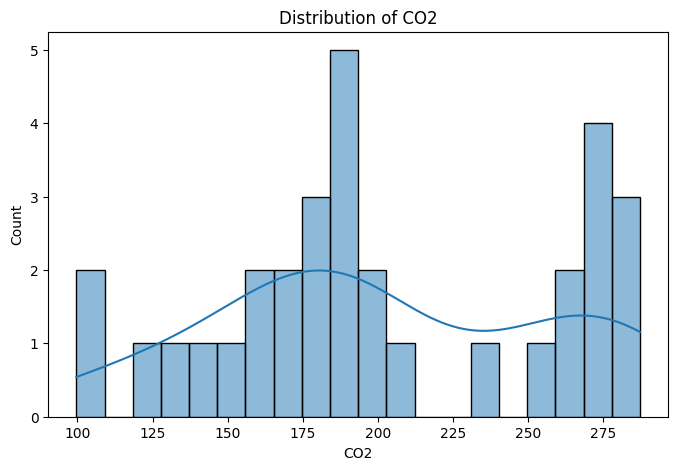

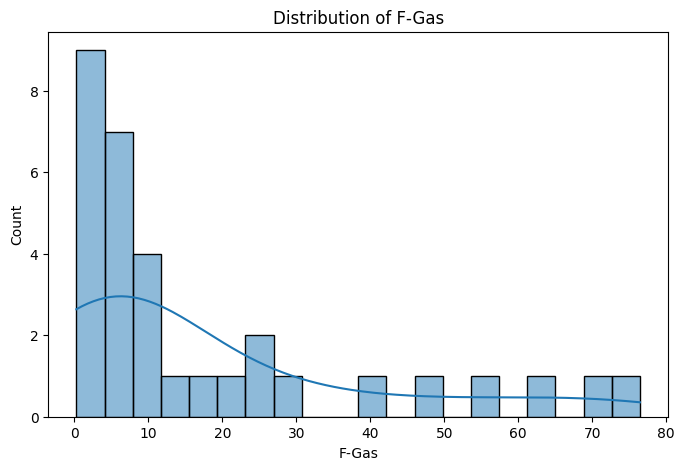

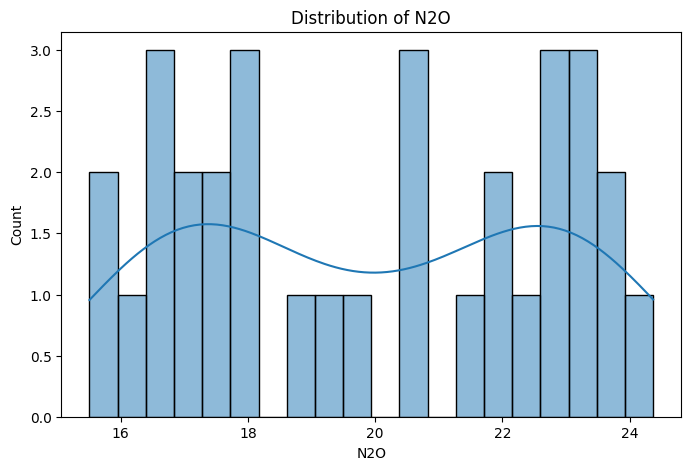

''

In [ ]:
#🔸การแก้ไข Imbalanced Dataset (ข้อมูลไม่สมดุล)
#ดูค่าเฉลี่ย (mean) และค่ามัธยฐาน (median) ของแต่ละคลาส
print(df.describe())

# สร้างลูปแสดงกราฟสำหรับแต่ละคอลัมน์ใน DataFrame
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:  # ตรวจสอบให้แสดงเฉพาะคอลัมน์ที่มีชนิดข้อมูลตัวเลข
        plt.figure(figsize=(8, 5))  # กำหนดขนาดกราฟ
        sns.histplot(df[column], bins=20, kde=True)  # สร้างกราฟ histplot พร้อม kde
        plt.title(f"Distribution of {column}")  # ชื่อกราฟตามชื่อคอลัมน์
        plt.show()  # แสดงกราฟ

input("Press Enter to exit...")

In [ ]:
# ปัดค่าทศนิยมในคอลัมน์ตัวเลขให้เหลือ 2 ตำแหน่ง
df = df.round(2)